In [61]:
import json
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import pprint
import os
import pygaps

In [62]:
files = [file for file in os.listdir('expt_data') if file.endswith('.csv')]
files

['NOTT-300-CO2_293.csv',
 'Co-CN6-CO2_298.csv',
 'MFM601-CO2_298.csv',
 'Zn-bdc-ted-SO2_298.csv',
 'NOTT-300-SO2_293.csv',
 'Zn-bdc-ted-CO2_298.csv',
 'Zn-CN6-CO2_298.csv',
 'KAUST7-SO2_298.csv',
 'MFM-300-In-SO2_298.csv',
 'NOTT-202a-SO2_293.csv',
 'KAUST8-CO2_298.csv',
 'Mg-MOF-74-CO2_293.csv',
 'Ni-bdc-ted-SO2_298.csv',
 'MFM600-SO2_298.csv',
 'MFM601-SO2_298.csv',
 'KAUST8-SO2_298.csv',
 'MFM600-CO2_298.csv',
 'MFM-300-In-CO2_298.csv',
 'NOTT-202a-CO2_293.csv',
 'KAUST7-CO2_298.csv',
 'Mg-MOF-74-SO2_298.csv',
 'Zn-CN6-SO2_298.csv',
 'Co-CN6-SO2_298.csv',
 'Ni-bdc-ted-CO2_298.csv']

In [63]:
nb_pts_to_incl_in_fitting = {}
nb_pts_to_incl_in_fitting["Co-CN6-CO2_298.csv"] = 2
nb_pts_to_incl_in_fitting["Co-CN6-SO2_298.csv"] = 2
nb_pts_to_incl_in_fitting["MFM-300-In-CO2_298.csv"] = 3
nb_pts_to_incl_in_fitting["MFM-300-In-SO2_298.csv"] = 3
nb_pts_to_incl_in_fitting["MFM600-CO2_298.csv"] = 3
nb_pts_to_incl_in_fitting["MFM600-SO2_298.csv"] = 2
nb_pts_to_incl_in_fitting["MFM601-CO2_298.csv"] = 2
nb_pts_to_incl_in_fitting["MFM601-SO2_298.csv"] = 2
nb_pts_to_incl_in_fitting["Ni-bdc-ted-CO2_298.csv"] = 2
nb_pts_to_incl_in_fitting["Ni-bdc-ted-SO2_298.csv"] = 4
nb_pts_to_incl_in_fitting["NOTT-202a-CO2_293.csv"] = 3
nb_pts_to_incl_in_fitting["NOTT-202a-SO2_293.csv"] = 2
nb_pts_to_incl_in_fitting["NOTT-300-CO2_293.csv"] = 4
nb_pts_to_incl_in_fitting["NOTT-300-SO2_293.csv"] = 4
nb_pts_to_incl_in_fitting["Zn-bdc-ted-CO2_298.csv"] = 6
nb_pts_to_incl_in_fitting["Zn-bdc-ted-SO2_298.csv"] = 2
nb_pts_to_incl_in_fitting["Zn-CN6-CO2_298.csv"] = 2
nb_pts_to_incl_in_fitting["Zn-CN6-SO2_298.csv"] = 2
nb_pts_to_incl_in_fitting["Mg-MOF-74-CO2_293.csv"] = 4
nb_pts_to_incl_in_fitting["Mg-MOF-74-SO2_298.csv"] = 2
nb_pts_to_incl_in_fitting["mgmof74-CO2_303.csv"] = 4
nb_pts_to_incl_in_fitting["mgmof74-CO2_293.csv"] = 4
nb_pts_to_incl_in_fitting["KAUST7-CO2_298.csv"] = 4
nb_pts_to_incl_in_fitting["KAUST7-SO2_298.csv"] = 3
nb_pts_to_incl_in_fitting["KAUST8-CO2_298.csv"] = 4
nb_pts_to_incl_in_fitting["KAUST8-SO2_298.csv"] = 4

sensing_constants = pd.read_csv('henry_constants.csv')
sensing_constants[sensing_constants.crystal == 'MFM601']

,crystal,CO2_henry coefficient [mmol/(g-bar)],CO2_Temperature [K],SO2_henry coefficient [mmol/(g-bar)],SO2_Temperature [K]
0,MFM601,1.370301,298,97.240663,298


Calculated K = 6.96046472190639
Starting points: 26
Selected points: 18
Final adjusted root mean square difference: 0.018651316208177126


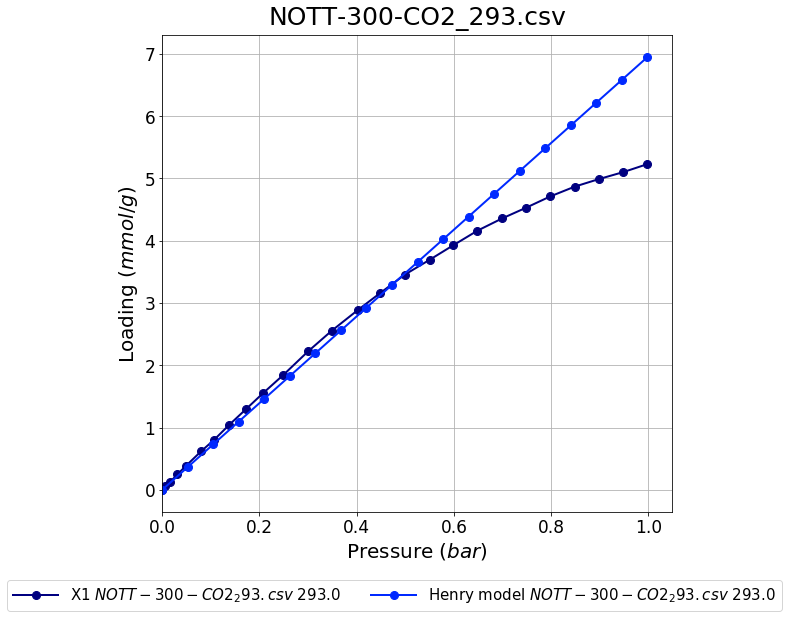

Calculated K = 2.440927439205603
Starting points: 10
Selected points: 2
Final adjusted root mean square difference: 4.16420454127746e-15


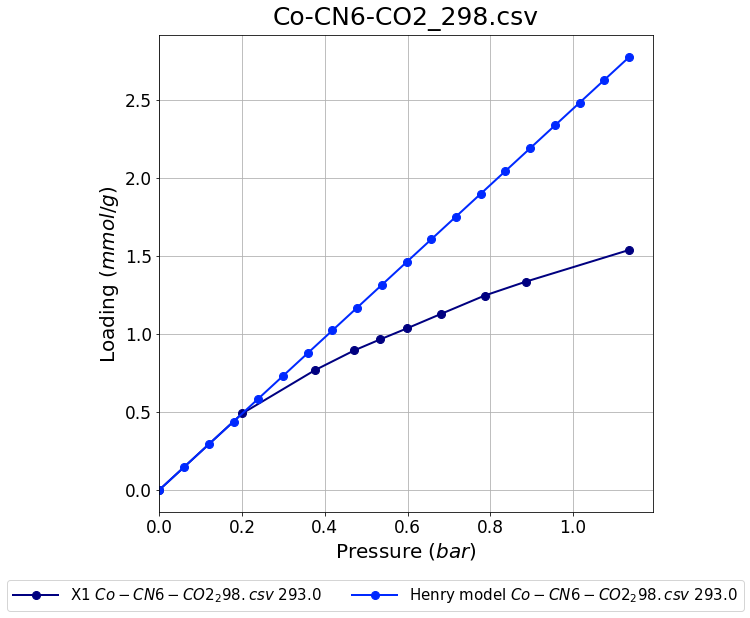

Calculated K = 1.1531688304459184
Starting points: 18
Selected points: 12
Final adjusted root mean square difference: 0.012420800501424465


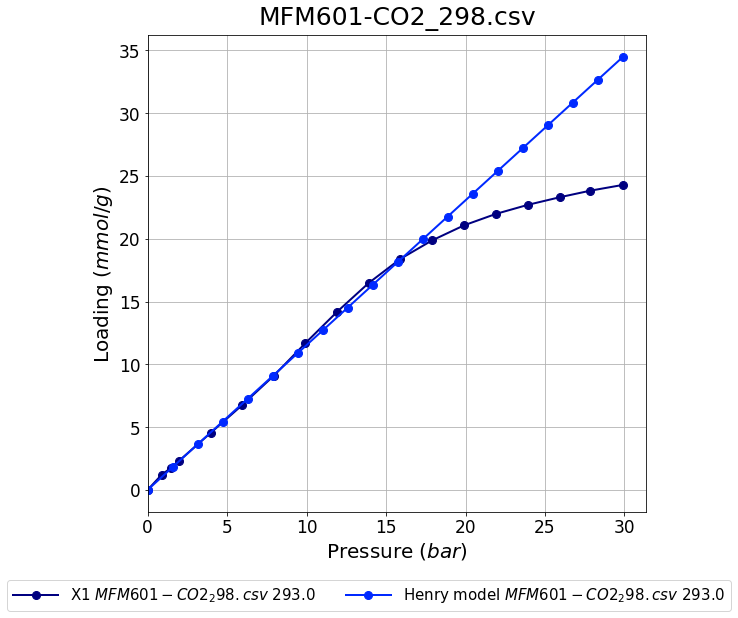

Calculated K = 2.107430955484947
Starting points: 19
Selected points: 8
Final adjusted root mean square difference: 0.01168880662925787


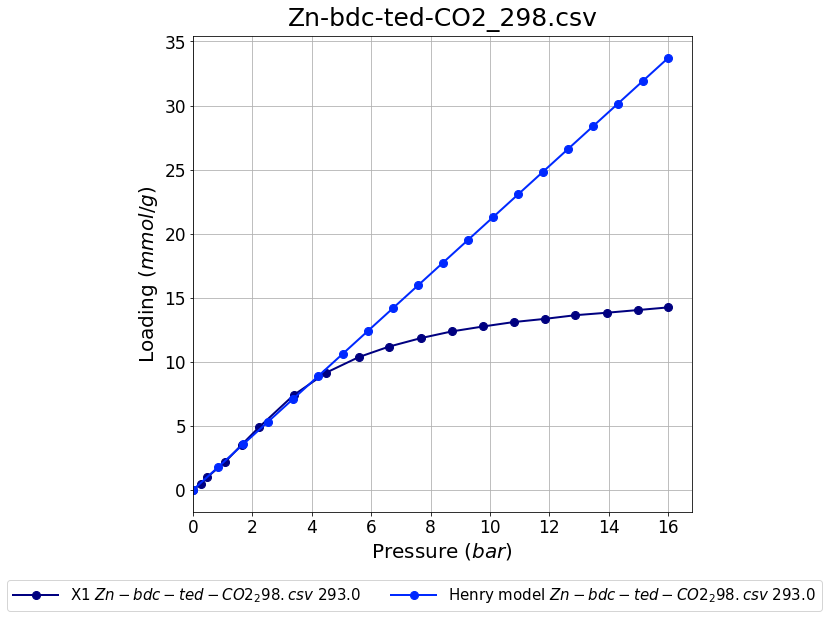

Calculated K = 5.170579516110261
Starting points: 11
Selected points: 2
Final adjusted root mean square difference: 3.787621483177446e-14


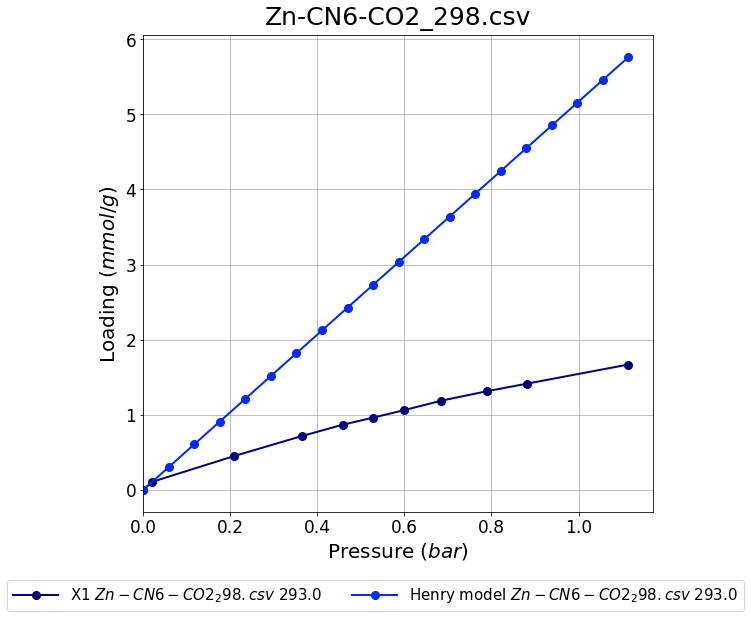

Calculated K = 103.744565829552
Starting points: 30
Selected points: 2
Final adjusted root mean square difference: 1.8471406822201644e-10


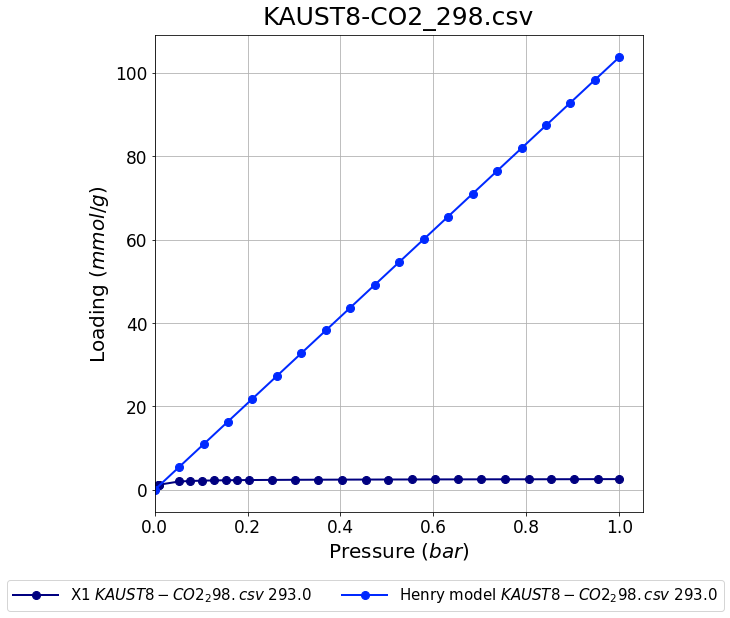

Calculated K = 198.82031983208324
Starting points: 30
Selected points: 4
Final adjusted root mean square difference: 0.014282757109538715


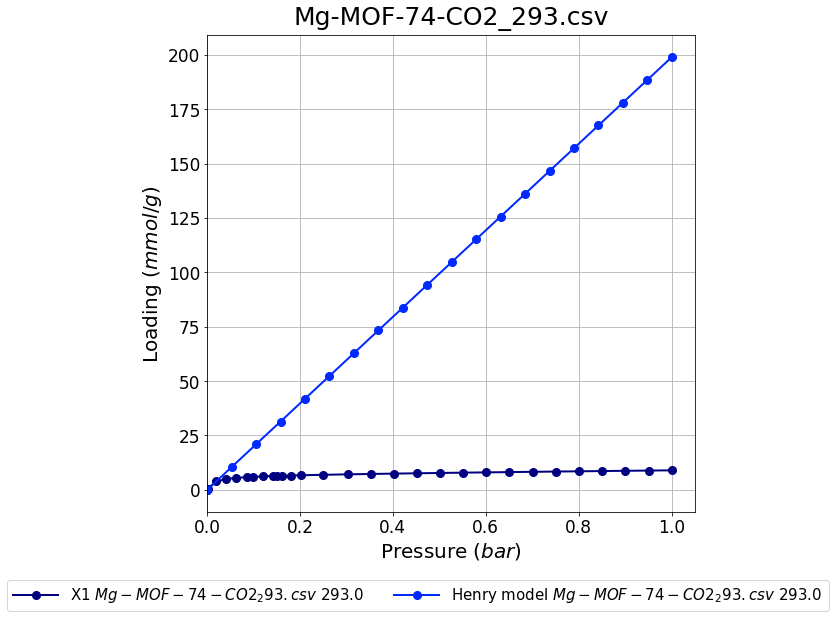

Calculated K = 1.1787965635362088
Starting points: 18
Selected points: 7
Final adjusted root mean square difference: 0.019365020316481654


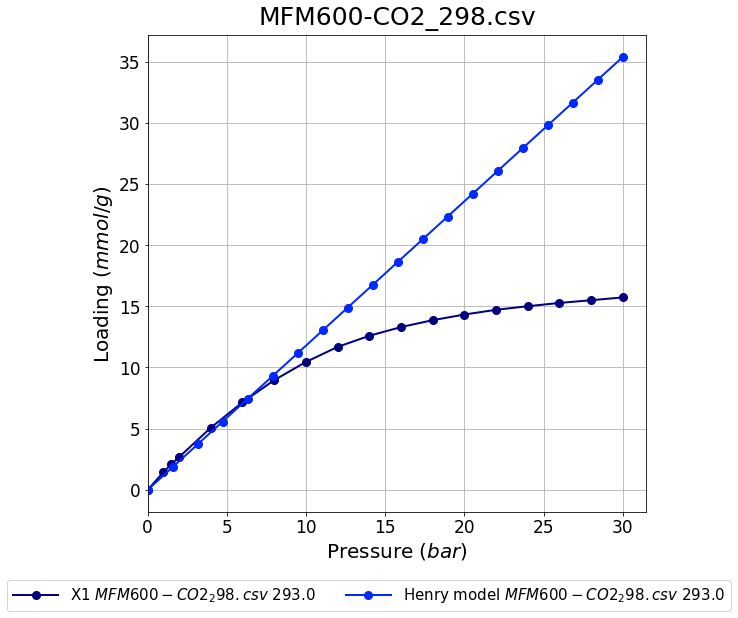

Calculated K = 3.727810796765252
Starting points: 11
Selected points: 11
Final adjusted root mean square difference: 0.012889444511484587


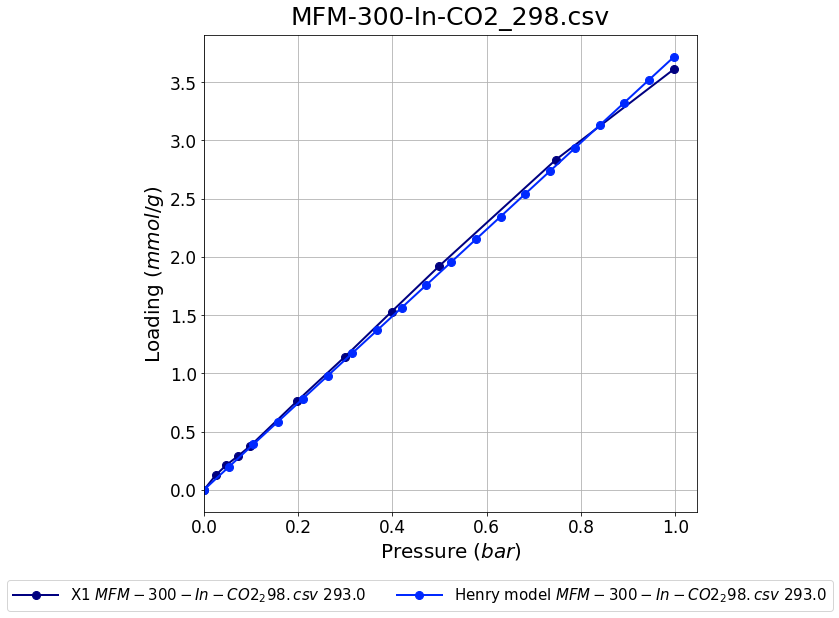

Calculated K = 1.3571508537501957
Starting points: 22
Selected points: 22
Final adjusted root mean square difference: 0.0040000370183754675


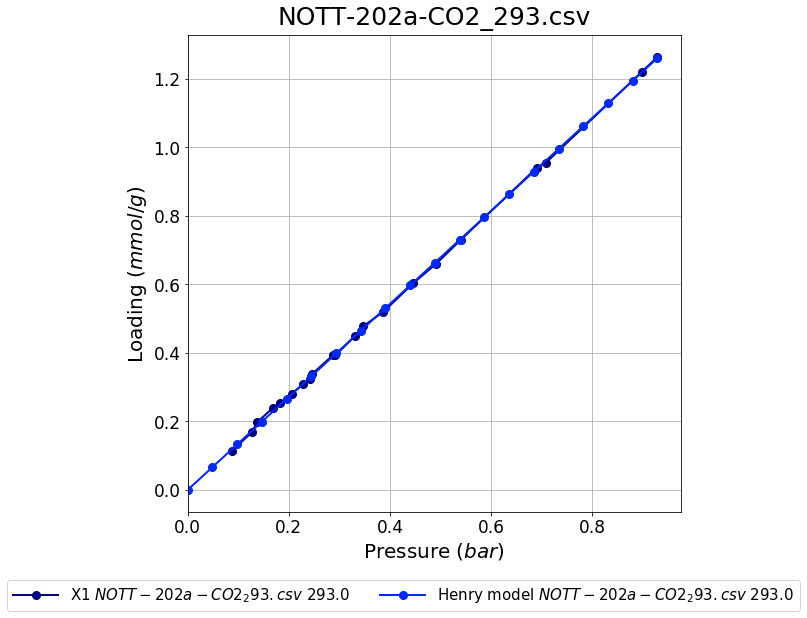

Calculated K = 425.06562500938935
Starting points: 33
Selected points: 2
Final adjusted root mean square difference: 2.2982677275599903e-12


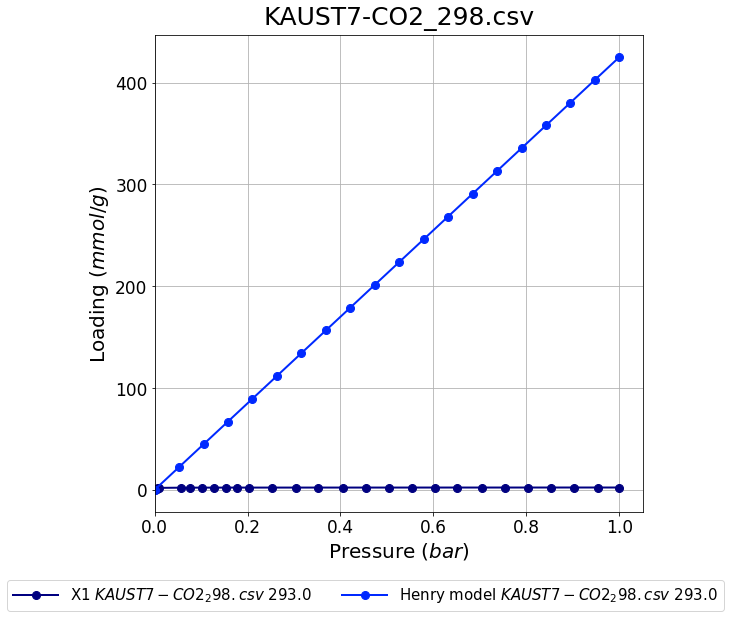

Calculated K = 1.9252969206933264
Starting points: 19
Selected points: 8
Final adjusted root mean square difference: 0.012647570708720784


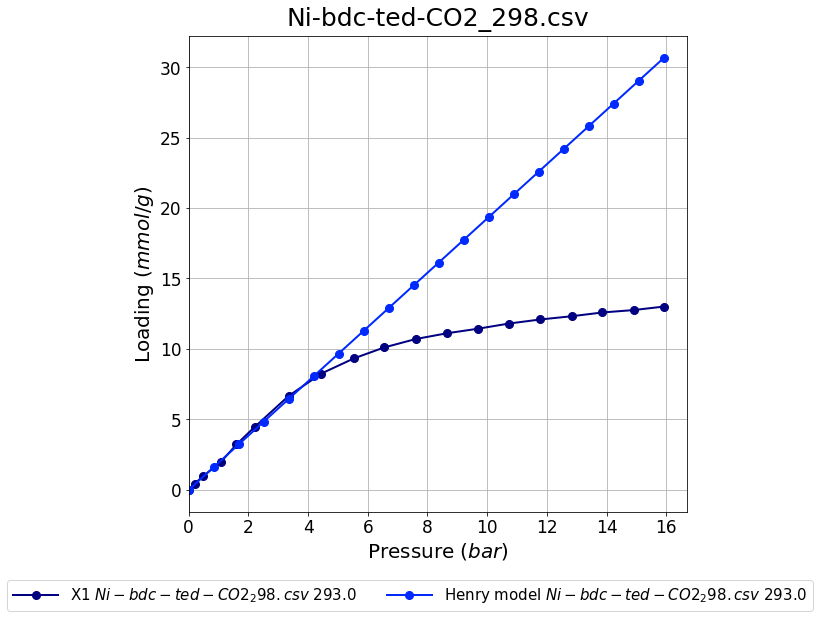

Calculated K = 18.345523504130572
Starting points: 10
Selected points: 3
Final adjusted root mean square difference: 0.008962412727293721


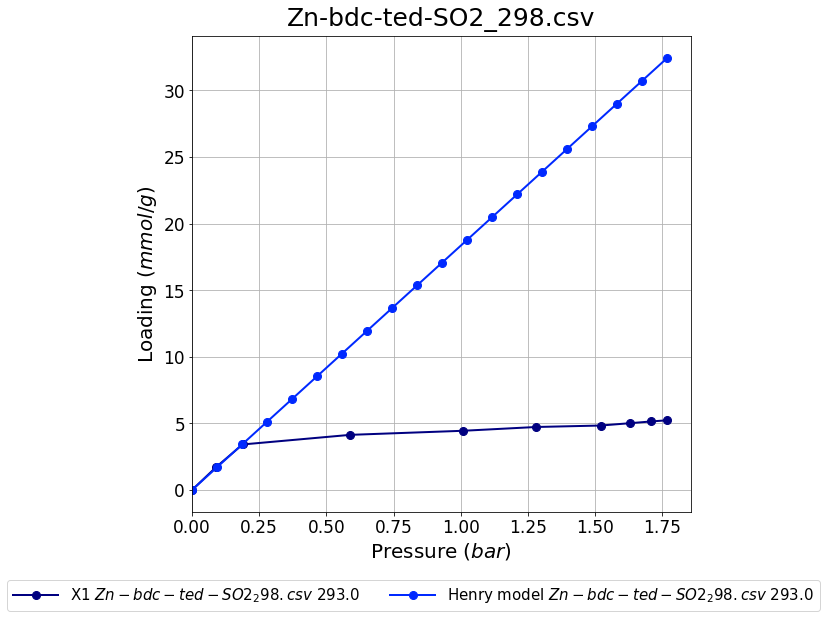

Calculated K = 483.8635912483498
Starting points: 28
Selected points: 4
Final adjusted root mean square difference: 0.017809739290938178


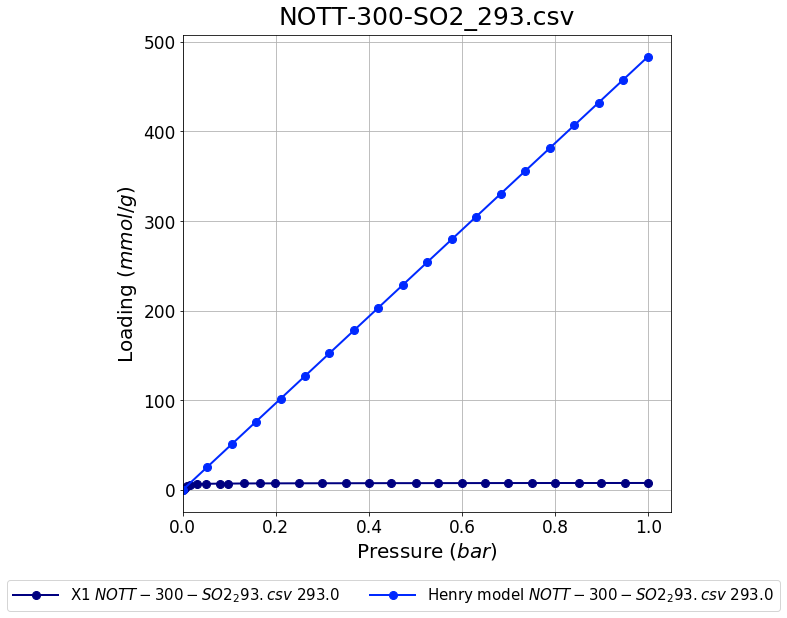

Calculated K = 26.588414310996125
Starting points: 11
Selected points: 4
Final adjusted root mean square difference: 0.007299941055388362


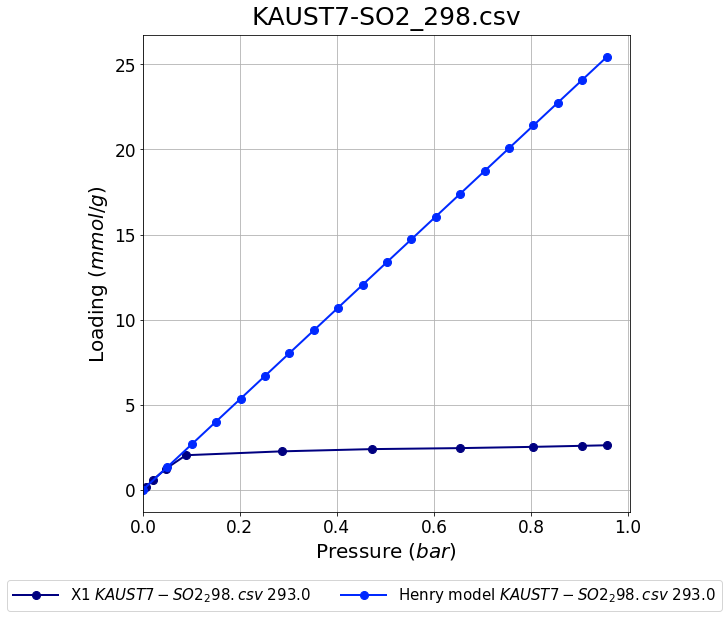

Calculated K = 148.7543281147709
Starting points: 39
Selected points: 8
Final adjusted root mean square difference: 0.01900822639313014


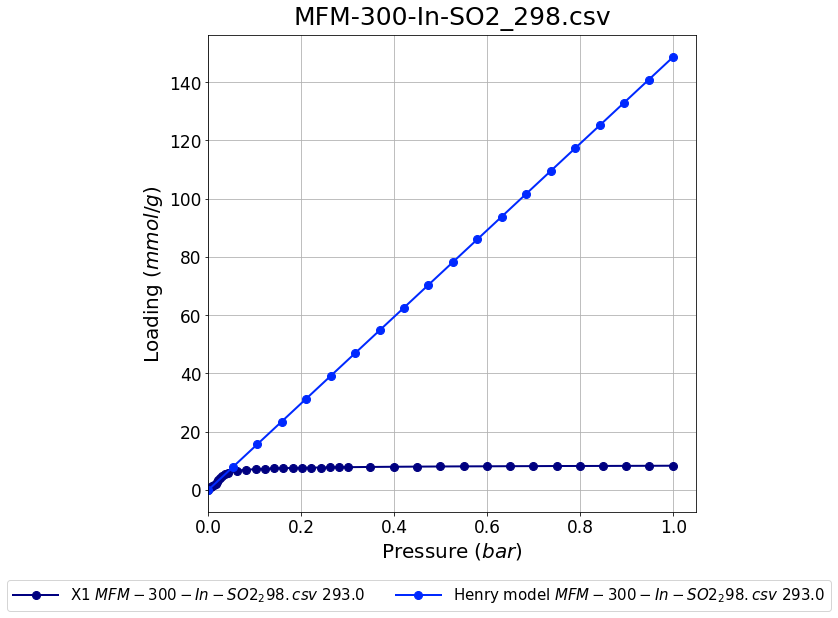

Calculated K = 153.60000018850255
Starting points: 26
Selected points: 2
Final adjusted root mean square difference: 1.2980684166199662e-10


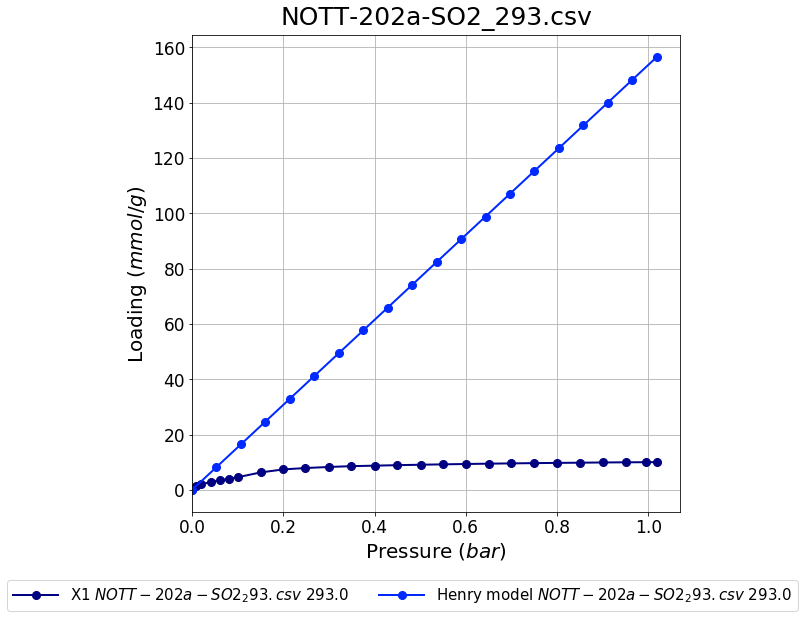

Calculated K = 29.681890225500194
Starting points: 11
Selected points: 2
Final adjusted root mean square difference: 1.136914898135839e-13


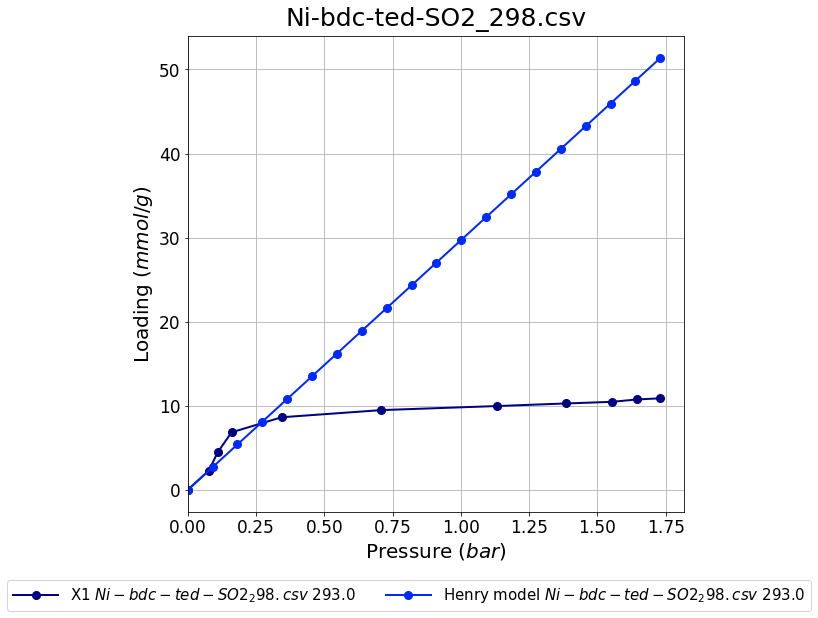

Calculated K = 34.79725440997228
Starting points: 16
Selected points: 2
Final adjusted root mean square difference: 2.9484891332333986e-14


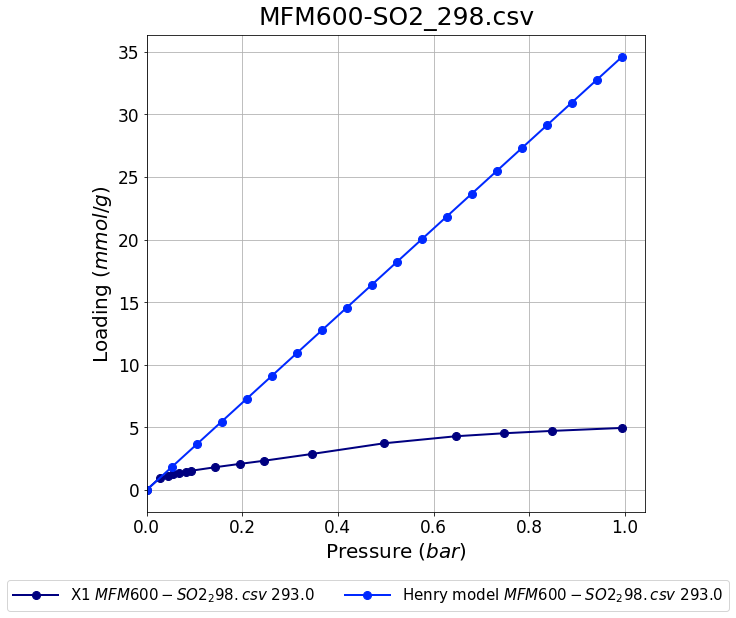

Calculated K = 97.24066284283823
Starting points: 16
Selected points: 2
Final adjusted root mean square difference: 0.0


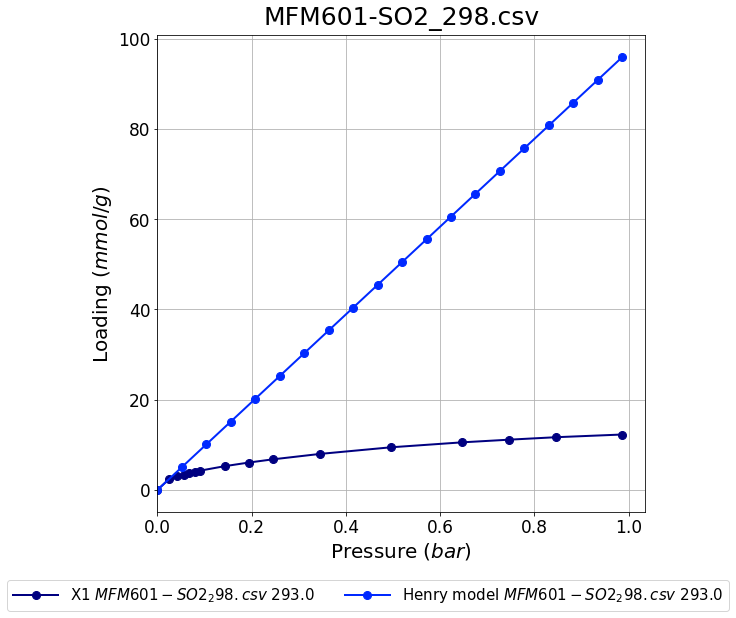

Calculated K = 17.923008229468238
Starting points: 12
Selected points: 6
Final adjusted root mean square difference: 0.00632804082418362


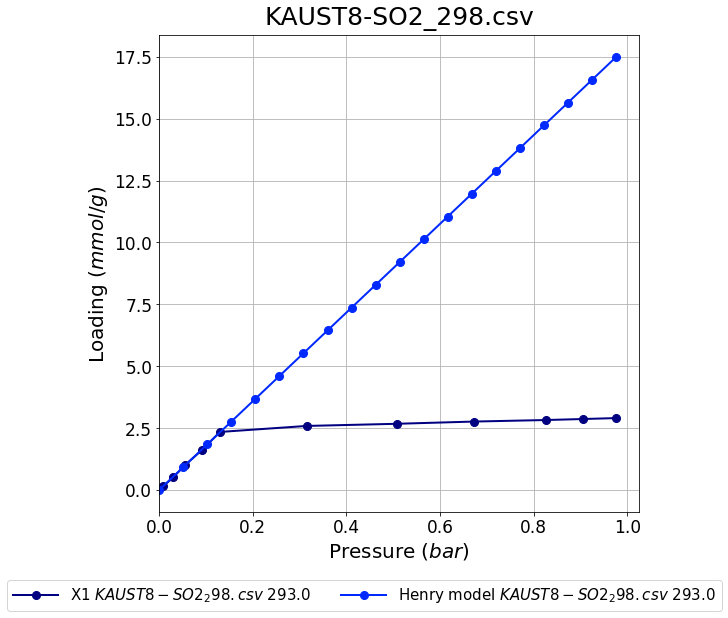

Calculated K = 142.9984035243577
Starting points: 10
Selected points: 3
Final adjusted root mean square difference: 0.004883530721533332


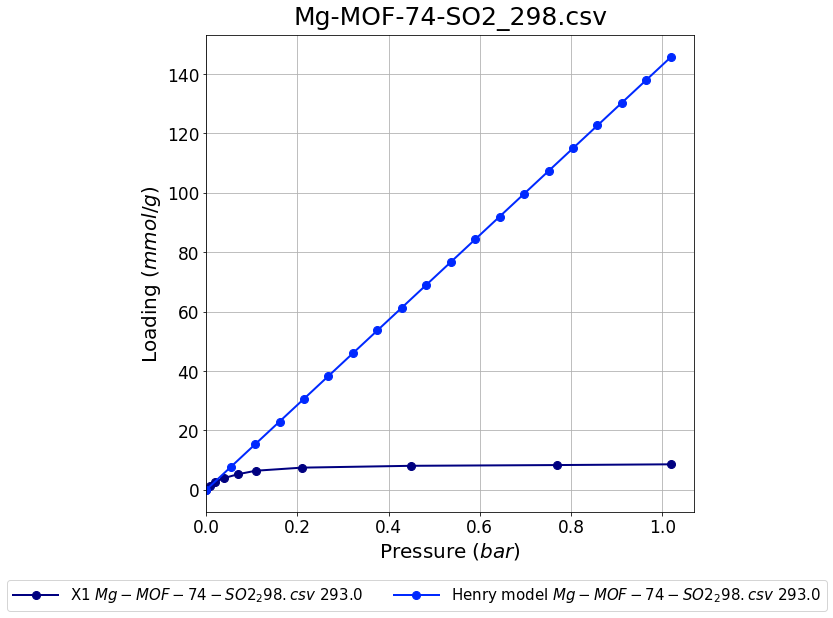

Calculated K = 4.364833666657838
Starting points: 5
Selected points: 2
Final adjusted root mean square difference: 3.699932720762579e-12


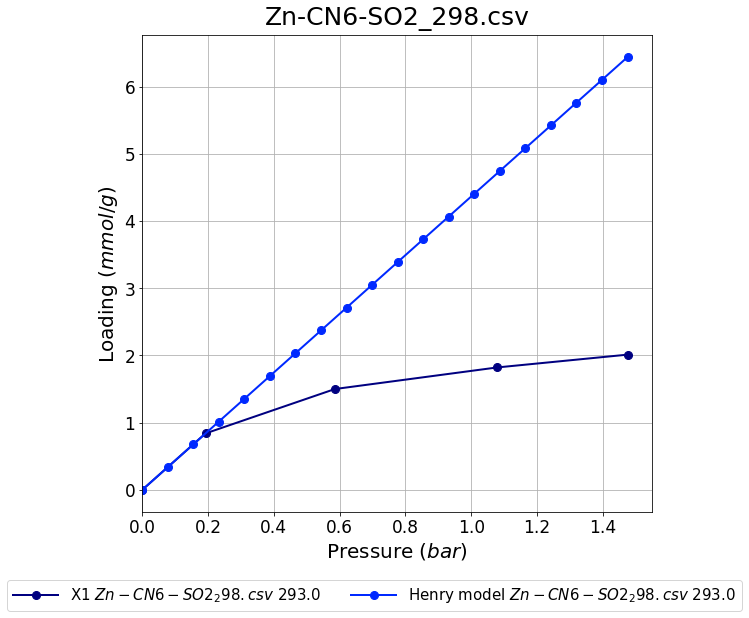

Calculated K = 11.692120591647235
Starting points: 5
Selected points: 2
Final adjusted root mean square difference: 4.430038254767126e-10


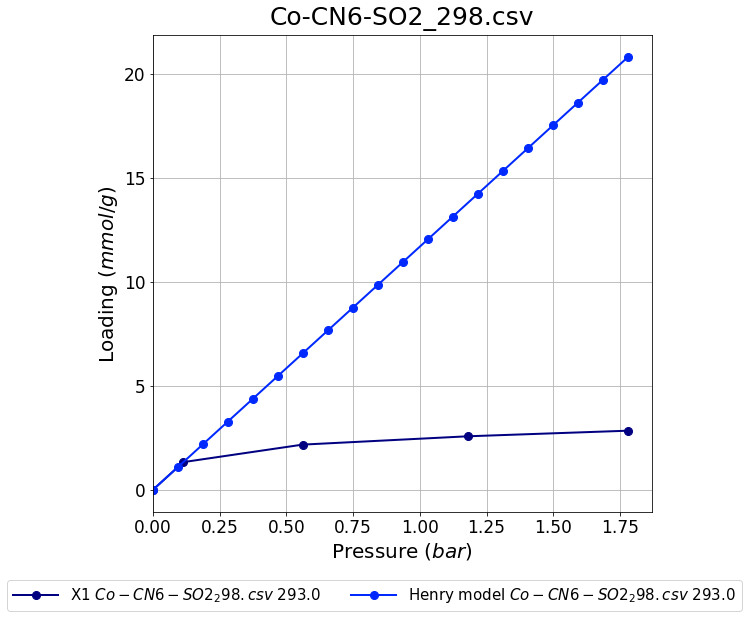

In [64]:
co2_isotherms = []
so2_isotherms = []
for file in files:
    data = pd.read_csv('expt_data/' + file)
    mofstuff = file.split('_')
    gasname = mofstuff[0].split('-')[-1]
    mofname = mofstuff[0][:-4]
    isotherm = pygaps.PointIsotherm(
        pressure=data['Pressure(bar)'],
        loading=data['Adsorption(mmol/g)'],
        material_name=file,
        material_batch='X1',
        adsorbate=file,
        t_iso = 293)
    if gasname == 'SO2':
        so2_isotherms.append(isotherm)
    elif gasname == 'CO2':
        co2_isotherms.append(isotherm)
    else:
        print('what?!')
henries = {}
co2_henries = {}
co2_henries['pygaps'] = []
co2_henries['sensing'] = []
so2_henries = {}
so2_henries['pygaps'] = []
so2_henries['sensing'] = []
for isotherm in co2_isotherms:
    file = isotherm.material_name
    mofstuff = file.split('_')
    gasname = mofstuff[0].split('-')[-1]
    mofname = mofstuff[0][:-4]
    if 'co2_' + mofname not in henries.keys():
        henries['co2_' + mofname] = {}
    h1 = pygaps.initial_henry_slope(isotherm, max_adsrms=0.01, logx=False, verbose=True)
    henries['co2_' + mofname]['pygaps'] = h1
    henries['co2_' + mofname]['sensing'] = np.float(sensing_constants[sensing_constants.crystal == mofname]['CO2_henry coefficient [mmol/(g-bar)]'])
for isotherm in so2_isotherms:
    file = isotherm.material_name
    mofstuff = file.split('_')
    gasname = mofstuff[0].split('-')[-1]
    mofname = mofstuff[0][:-4]
    if 'so2_' + mofname not in henries.keys():
        henries['so2_' + mofname] = {}
    h1 = pygaps.initial_henry_slope(isotherm, max_adsrms=0.01, logx=False, verbose=True)
    henries['so2_' + mofname]['pygaps'] = h1
    henries['so2_' + mofname]['sensing'] = np.float(sensing_constants[sensing_constants.crystal == mofname]['SO2_henry coefficient [mmol/(g-bar)]'])
    


In [65]:
henries

{'co2_NOTT-300': {'pygaps': 6.96046472190639, 'sensing': 7.965261999999999},
 'co2_Co-CN6': {'pygaps': 2.440927439205603, 'sensing': 2.440927},
 'co2_MFM601': {'pygaps': 1.1531688304459184, 'sensing': 1.370301},
 'co2_Zn-bdc-ted': {'pygaps': 2.107430955484947, 'sensing': 2.158665},
 'co2_Zn-CN6': {'pygaps': 5.170579516110261, 'sensing': 5.17058},
 'co2_KAUST8': {'pygaps': 103.744565829552, 'sensing': 163.18373},
 'co2_Mg-MOF-74': {'pygaps': 198.82031983208324, 'sensing': 198.82032},
 'co2_MFM600': {'pygaps': 1.1787965635362088, 'sensing': 1.418831},
 'co2_MFM-300-In': {'pygaps': 3.727810796765252, 'sensing': 4.607513},
 'co2_NOTT-202a': {'pygaps': 1.3571508537501957, 'sensing': 1.371089},
 'co2_KAUST7': {'pygaps': 425.06562500938935, 'sensing': 261.69125},
 'co2_Ni-bdc-ted': {'pygaps': 1.9252969206933264, 'sensing': 2.206897},
 'so2_Zn-bdc-ted': {'pygaps': 18.345523504130572, 'sensing': 19.169554},
 'so2_NOTT-300': {'pygaps': 483.8635912483498, 'sensing': 483.86359100000004},
 'so2_KAU

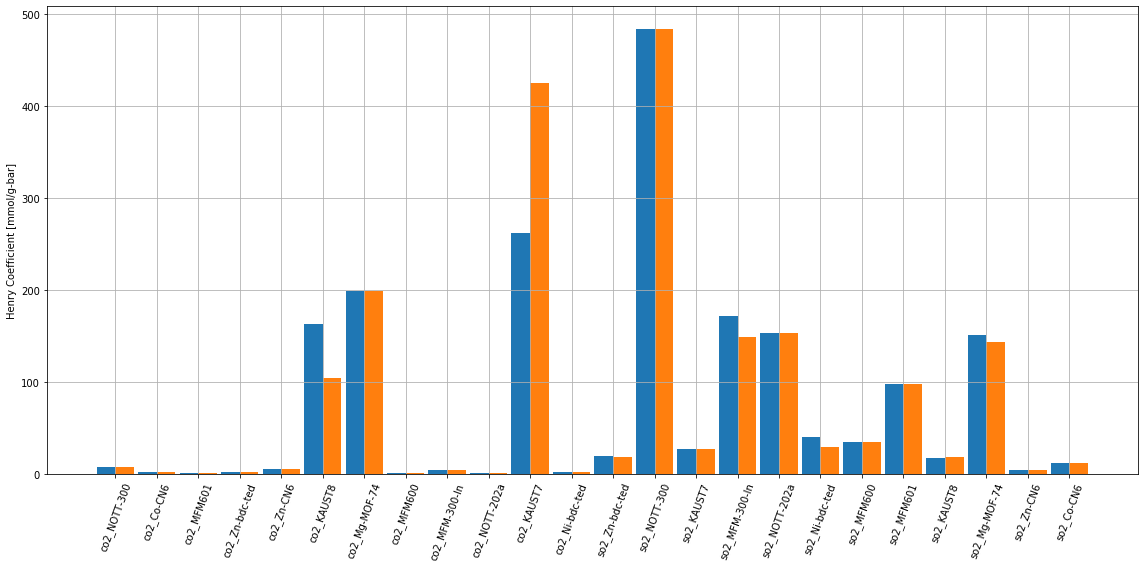

In [66]:
fig = plt.figure(figsize=(16,8))
names = []
sensing = []
pygaps = []
for key in henries:
    names.append(key)
    sensing.append(henries[key]['sensing'])
    pygaps.append(henries[key]['pygaps'])

ind = np.arange(len(names))
width = 0.45
rects1 = plt.bar(ind-width/2, sensing, width)
rects2 = plt.bar(ind+width/2, pygaps, width)
ax = plt.gca()
ax.set_xticks(np.arange(len(names)))
ax.set_xticklabels(names)
plt.xticks(rotation=70)
plt.ylabel('Henry Coefficient [mmol/g-bar]')
plt.tight_layout()
plt.grid()

plt.show()